In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import sklearn

titanic = pd.read_csv('./train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic.shape

(891, 12)

In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

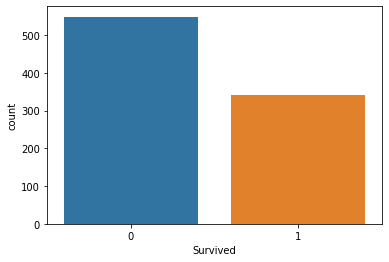

In [5]:
sns.countplot( titanic['Survived'] )

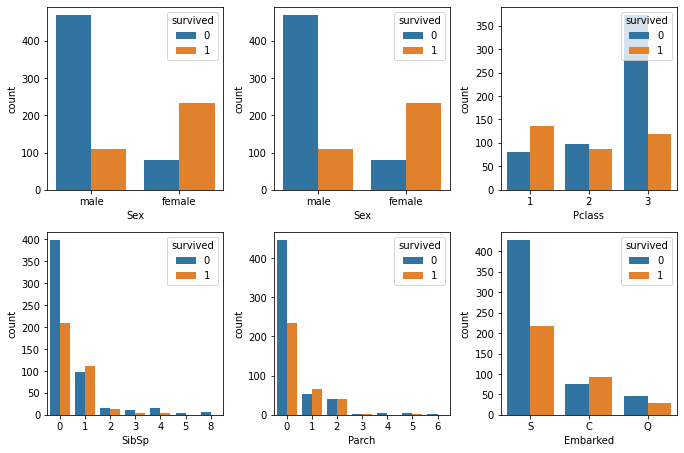

In [6]:
features = ['Sex', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
rows = 2
cols = 3

fig, axs = plt.subplots(rows, cols, figsize = (cols*3.2, rows*3.2))

for r in range(rows):
    for c in range(cols):
        i = r * cols + c
        axt = axs[r][c]
        sns.countplot(titanic[features[i]], hue = titanic["Survived"], ax=axt)
        axt.legend(title="survived", loc='upper right')

plt.tight_layout()

In [7]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

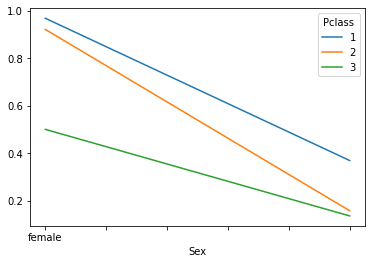

In [9]:
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

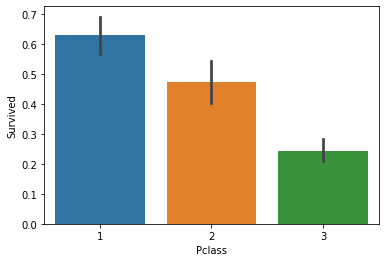

In [10]:
sns.barplot(x='Pclass', y='Survived', data = titanic)

In [11]:
age = pd.cut(titanic['Age'], [0,18,80])
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [33]:
plt.scatter(titanic['Fare'], titanic['Pclass'], color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('price/fare')
plt.title('Price of each class')
plt.legend()


KeyError: 'Fare'

In [13]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
def splitColumn(data, feature):
    vals = set(data[feature])
    for val in vals:
        if str(val) == "nan":
            continue
        a = []
        for i in range(data.shape[0]):
            if data[feature][i] == val:
                a.append(1)
            else: a.append(0)
        data[feature+"_"+str(val)] = a
    return data.drop([feature], axis = 1)

def splitFloatColumn(data, feature, diapasones):
    for i in range(len(diapasones)+1):
        a = []
        for j in range(data.shape[0]):
            t = True
            if i > 0:
                t &= (data[feature][j] >= diapasones[i-1])
            if i < len(diapasones):
                t &= (data[feature][j] < diapasones[i])
            if t:
                a.append(1)
            else: a.append(0)
        data[feature+"_"+str(i)] = a
    return data.drop([feature], axis = 1)

In [17]:
def preprocess(data):
    for i in range(data.shape[0]):
        if np.isnan(data["Age"][i]):
            if "Miss" in data["Name"][i] or "Ms" in data["Name"][i] :
                data["Age"][i] = 15
            elif "Mrs" in data["Name"][i] or "Mr" in data["Name"][i] :
                data["Age"][i] = 30
            elif "Don." in data["Name"][i] :
                data["Age"][i] = 40
            else :
                data["Age"][i] = 10
        
            
    data = data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis = 1)
    print(data)
    data = splitColumn(data, "Embarked")
    data = splitColumn(data, "Sex")
    data = splitColumn(data, "Pclass")
    data = splitFloatColumn(data, "Parch", [1,2,4])
    data = splitFloatColumn(data, "SibSp", [1,2,4])
    data = splitFloatColumn(data, "Age", [2,5,10,16,20,28,35,45])
    data = splitFloatColumn(data, "Fare", [7, 9, 10, 15, 30, 60, 80])

    for feature in data:
        print(feature)
        for i in range(data.shape[0]):
            if np.isnan(data[feature][i]):
                data[feature][i] = 0

    print(data)
    return data

def split_data(data):
    return (data.iloc[:, 1:].values, data.iloc[:, 0].values)

In [18]:
titanic = preprocess(titanic)
titanic.dtypes

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  15.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
Survived
Embarked_S
Embarked_C
Embarked_Q
Sex_female
Sex_male
Pclass_1
Pclass_2
Pclass_3
Parch_0
Parch_1
Parch_2
Parch_3
SibSp_0
SibSp_1
SibSp_2
SibSp_3
Age_0
A

Survived      int64
Embarked_S    int64
Embarked_C    int64
Embarked_Q    int64
Sex_female    int64
Sex_male      int64
Pclass_1      int64
Pclass_2      int64
Pclass_3      int64
Parch_0       int64
Parch_1       int64
Parch_2       int64
Parch_3       int64
SibSp_0       int64
SibSp_1       int64
SibSp_2       int64
SibSp_3       int64
Age_0         int64
Age_1         int64
Age_2         int64
Age_3         int64
Age_4         int64
Age_5         int64
Age_6         int64
Age_7         int64
Age_8         int64
Fare_0        int64
Fare_1        int64
Fare_2        int64
Fare_3        int64
Fare_4        int64
Fare_5        int64
Fare_6        int64
Fare_7        int64
dtype: object

In [19]:
X,Y = split_data(titanic)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
def check_model(x_train, y_train, x_test, y_test, model):
    print("traindata:", model.score(x_train, y_train))
    print("testdata:" , model.score(x_test, y_test))
    print()

def models(x_train, y_train, x_test, y_test):
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion="entropy")
    tree.fit(x_train,y_train)
    
    from sklearn.linear_model import LogisticRegression
    logReg = LogisticRegression(max_iter=1000000)
    logReg.fit(x_train,y_train)

    from sklearn.neighbors import KNeighborsClassifier
    neighbors = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p = 2)
    neighbors.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion="entropy")
    forest.fit(x_train,y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train,y_train)

    from sklearn.svm import SVC
    svc = SVC(kernel="linear")
    svc.fit(x_train,y_train)
    
    svcRBF = SVC(kernel="rbf")
    svcRBF.fit(x_train,y_train)

    print("tree")
    check_model(x_train, y_train, x_test, y_test, tree)
    print("logReg")
    check_model(x_train, y_train, x_test, y_test, logReg)
    print("neighbors")
    check_model(x_train, y_train, x_test, y_test, neighbors)
    print("forest")
    check_model(x_train, y_train, x_test, y_test, forest)
    print("gauss")
    check_model(x_train, y_train, x_test, y_test, gauss)
    print("svc_linear")
    check_model(x_train, y_train, x_test, y_test, svc)
    print("svc_rbf")
    check_model(x_train, y_train, x_test, y_test, svcRBF)
    return svcRBF

In [29]:
model = models(X_train, Y_train, X_test, Y_test)

tree
traindata: 0.9073033707865169
testdata: 0.7821229050279329

logReg
traindata: 0.8300561797752809
testdata: 0.7877094972067039

neighbors
traindata: 0.8426966292134831
testdata: 0.7988826815642458

forest
traindata: 0.898876404494382
testdata: 0.8044692737430168

gauss
traindata: 0.773876404494382
testdata: 0.8100558659217877

svc_linear
traindata: 0.8132022471910112
testdata: 0.7988826815642458

svc_rbf
traindata: 0.8651685393258427
testdata: 0.8491620111731844



In [30]:
def generateAns(model):
    test_ids = pd.read_csv("test.csv")["PassengerId"]
    test = pd.read_csv("test.csv")

    test = preprocess(test)
    x, y = split_data(test)

    #Y_pred = models_predict(models, x)
    Y_pred = model.predict(x)
    print(Y_pred)
    Y_pred = Y_pred.astype(int) 
    print(Y_pred)

    submission = pd.DataFrame({
            "PassengerId": test_ids,
            "Survived": Y_pred
        })
    submission.to_csv('./titanic.csv', index=False)
    print('Exported!')

In [31]:
generateAns(model)

     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  34.5      0      0    7.8292        Q
1           1       3  female  47.0      1      0    7.0000        S
2           1       2    male  62.0      0      0    9.6875        Q
3           1       3    male  27.0      0      0    8.6625        S
4           0       3  female  22.0      1      1   12.2875        S
..        ...     ...     ...   ...    ...    ...       ...      ...
413         0       3    male  30.0      0      0    8.0500        S
414         1       1  female  39.0      0      0  108.9000        C
415         0       3    male  38.5      0      0    7.2500        S
416         1       3    male  30.0      0      0    8.0500        S
417         1       3    male  10.0      1      1   22.3583        C

[418 rows x 8 columns]
Survived
Embarked_S
Embarked_C
Embarked_Q
Sex_female
Sex_male
Pclass_1
Pclass_2
Pclass_3
Parch_0
Parch_1
Parch_2
Parch_3
SibSp_0
SibSp_1
SibSp_2
Sib